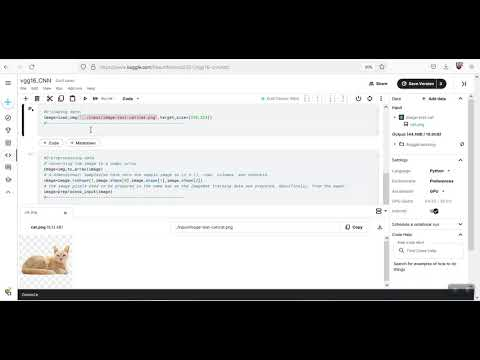

In [1]:
#vgg16 image classification model

from IPython.display import YouTubeVideo
YouTubeVideo('FMGahgc8wx0', width=800, height=450)
#----------------------------------------------------------


--------- Introduction ---------- 
Here we will learn how to:
1- Transfer Learning by an abstraction technique and zooming out the whole process (Object classification)
2- Reuse a robust model and tune it with our own project.
3- Work with image data type (image processing)
4- Test the vgg16_model and predict the input image

Researchers from the Oxford Visual Geometry Group, or VGG for short, participate in the ILSVRC challenge(Image Large Scale Visual Recognition Challenge)For the classification task, images must be classified into one of 1,000 different categories. 
With regard to this paper:https://machinelearningmastery.com/use-pre-trained-vgg-model-classify-objects-photographs/ 


In [2]:
#1-import requested libraries
import tensorflow as tf
from tensorflow import keras
# print(keras.__version__)
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.applications.vgg16 import decode_predictions

In [3]:
#2-loading data:
image=load_img('../input/image-test-cat/cat.png',target_size=(224,224))
#----------------------------------------------------------


In [4]:
#3-preprocessing data
# converting the image to a numpy array
image=img_to_array(image)
# 4-dimensional: samples(we have here one sample image so it's 1), rows, columns, and channels.
image=image.reshape(1,image.shape[0],image.shape[1],image.shape[2])
# the image pixels need to be prepared in the same way as the ImageNet training data was prepared. Specifically, from the paper:
image=preprocess_input(image)
#----------------------------------------------------------


In [5]:
#4-building the model
model=VGG16()
# Keras will download the weight files from the Internet and store them in the ~/.keras/models directory.
#Note that the weights are about 528 megabytes and Total params: 138,357,544Trainable params
# ----------------------------------------------------------


2022-03-02 21:43:15.825524: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-03-02 21:43:15.926395: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-03-02 21:43:15.927268: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-03-02 21:43:15.929157: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

553476096/553467096 [==============================] - 3s 0us/step


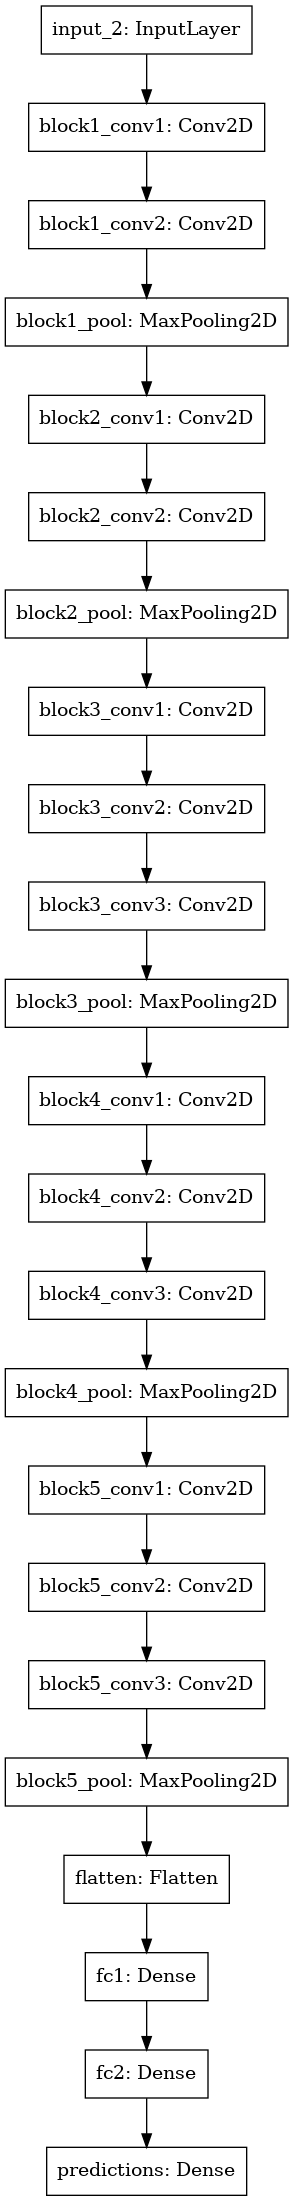

In [6]:
# We can also create a plot of the layers in the VGG model, as follows:
from keras.utils.vis_utils import plot_model
model=VGG16()
plot_model(model, to_file='vgg.png')

In [7]:
#5-predicting
#to get a prediction of the probability of the image belonging to each of the 1000 known object types.
yhat=model.predict(image)
#----------------------------------------------------------


2022-03-02 21:43:25.179280: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)
2022-03-02 21:43:26.506268: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


In [8]:
#6-decoding predictions (classifying based on the annotation label not on a number i.e mnist)
label=decode_predictions(yhat)
#----------------------------------------------------------


49152/35363 [=========================================] - 0s 0us/step


In [9]:
#7-retrieving the highest probability
label=label[0][0]
#----------------------------------------------------------


tiger_cat()54.93%)


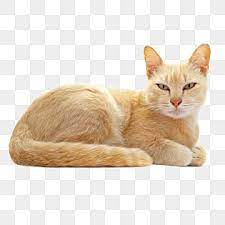

In [10]:
#8-printing the classification
print('%s()%.2f%%)'%(label[1],label[2]*100))
# showing the tested image
from IPython.display import Image
Image('../input/image-test-cat/cat.png')
Image('../input/image-test-cat/cat.png',width=224,height=224)